In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import itertools
import glob
from glob import glob
from PIL import Image
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

In [2]:
MR_dataset = glob('/kaggle/input/breast-histopathology-images/**/*.png', recursive=True)

In [3]:
images=[]
labels=[]
for i in MR_dataset[:15000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img=cv2.resize(img,(100,100))
        images.append(img)
        labels.append(label)

In [4]:
#Converts a class vector (integers) to binary class matrix
from tensorflow.keras.utils import to_categorical
x=np.stack(images)
x = (x/255).astype('float32')
y=to_categorical(labels)

In [5]:
#splitting train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

**The EfficientNet**
The EfficientNet class is available in Keras to help in transfer learning with ease. I used the EfficientNet-B0 class with ImageNet weights.

In [6]:
#The EfficientNet
model = models.Sequential()
model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2, activation = "sigmoid"))
model.summary()

2022-11-16 20:23:56.287984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 20:23:56.441142: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 20:23:56.441902: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-16 20:23:56.443566: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

16719872/16705208 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 4, 4, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [7]:
#Compiling the CNN
adam_opt = Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False)
model.compile(optimizer=adam_opt,loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
#training CNN
history= model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

2022-11-16 20:24:02.280599: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1440000000 exceeds 10% of free system memory.
2022-11-16 20:24:03.869507: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1440000000 exceeds 10% of free system memory.
2022-11-16 20:24:05.047358: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-11-16 20:24:13.873341: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


188/188 [==============================] - ETA: 0s - loss: 0.3082 - accuracy: 0.8731

2022-11-16 20:24:40.677262: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 360000000 exceeds 10% of free system memory.
2022-11-16 20:24:41.120428: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 360000000 exceeds 10% of free system memory.


188/188 [==============================] - 39s 128ms/step - loss: 0.3082 - accuracy: 0.8731 - val_loss: 0.6762 - val_accuracy: 0.7053
Epoch 2/100
188/188 [==============================] - 22s 115ms/step - loss: 0.2207 - accuracy: 0.9086 - val_loss: 0.8195 - val_accuracy: 0.7053
Epoch 3/100
188/188 [==============================] - 22s 115ms/step - loss: 0.1777 - accuracy: 0.9287 - val_loss: 1.6505 - val_accuracy: 0.7053
Epoch 4/100
188/188 [==============================] - 22s 116ms/step - loss: 0.1465 - accuracy: 0.9411 - val_loss: 1.3682 - val_accuracy: 0.7053
Epoch 5/100
188/188 [==============================] - 22s 115ms/step - loss: 0.1129 - accuracy: 0.9563 - val_loss: 1.2705 - val_accuracy: 0.7053
Epoch 6/100
188/188 [==============================] - 22s 116ms/step - loss: 0.0992 - accuracy: 0.9633 - val_loss: 0.8764 - val_accuracy: 0.7053
Epoch 7/100
188/188 [==============================] - 22s 116ms/step - loss: 0.0757 - accuracy: 0.9731 - val_loss: 0.6333 - val_accurac

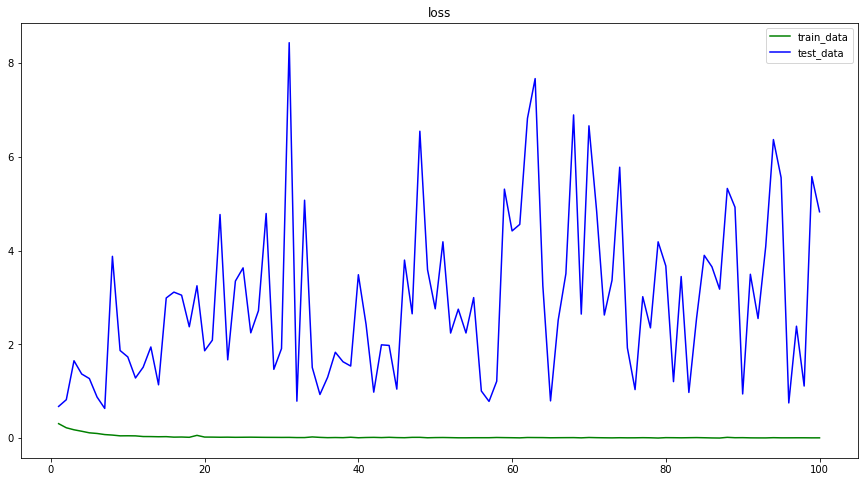

In [9]:
#checking loss
plt.figure(figsize=(15,8))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.legend(['train_data','test_data'])
plt.title('loss')
plt.show()

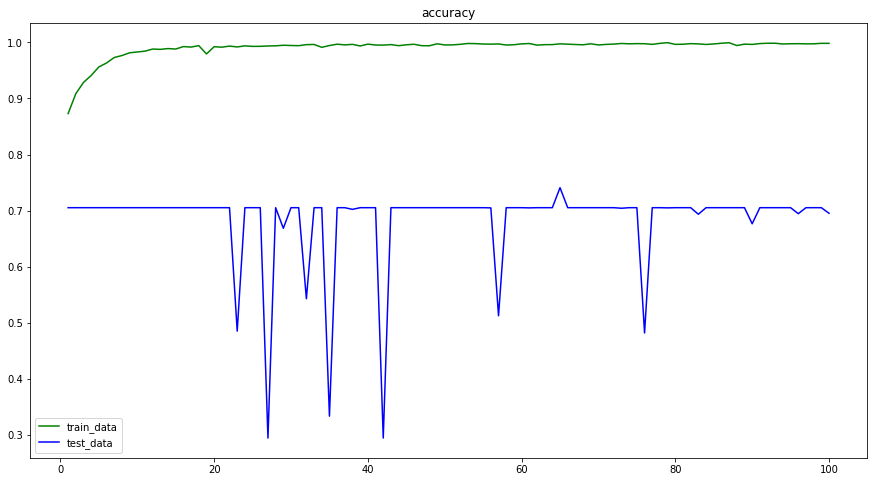

In [10]:
#checking Accuracy
plt.figure(figsize=(15,8))
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, acc_train, 'g', label='Training acc')
plt.plot(epochs, acc_val, 'b', label='validation acc')
plt.legend(['train_data','test_data'])
plt.title('accuracy')
plt.show()

In [11]:
Test_input = Image.open('../input/breast-histopathology-images/10288/1/10288_idx5_x1901_y301_class1.png')
Test_input = np.array(Test_input.resize((100, 100)))
Test_input = np.true_divide(Test_input, 255)
Test_input = Test_input.reshape(-1,100, 100,3)

In [12]:
#prediction
predict_x=model.predict(Test_input) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
classes = {'TRAIN': ['Benign','Malignant'],
           'TEST': ['Benign','Malignant']}

predicted_class = classes['TRAIN'][classes_x[0]]
print('Tumor is {}'.format(predicted_class.lower()))

[0]
Tumor is benign
